In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SALib.analyze import sobol, pawn



In [10]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [11]:
from cycler import cycler
import matplotlib as mpl

mpl.rcParams['axes.prop_cycle'] = cycler(color='mcrgbyk')


In [12]:
df_in = pd.read_csv('../data/sobol_params.csv')
X = df_in.to_numpy()

In [13]:
df_out = pd.read_csv('../data/sobol_output.csv')
Y = df_out.to_numpy()

In [14]:
seed = 1234

In [15]:
# param_names = ['beta1', 'beta2', 'beta3', 'mu', 'omega']
# param_bounds = [[2., 3.], [-0.4, -0.1], [-0.4, -0.1], [0.1, 0.6], [0.1, 0.5]]``

param_names = ['beta1', 'beta2', 'beta3']
param_bounds = [[1., 3.], [-0.5, -0.2], [-0.5, -0.2]]

problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': param_bounds
    } 

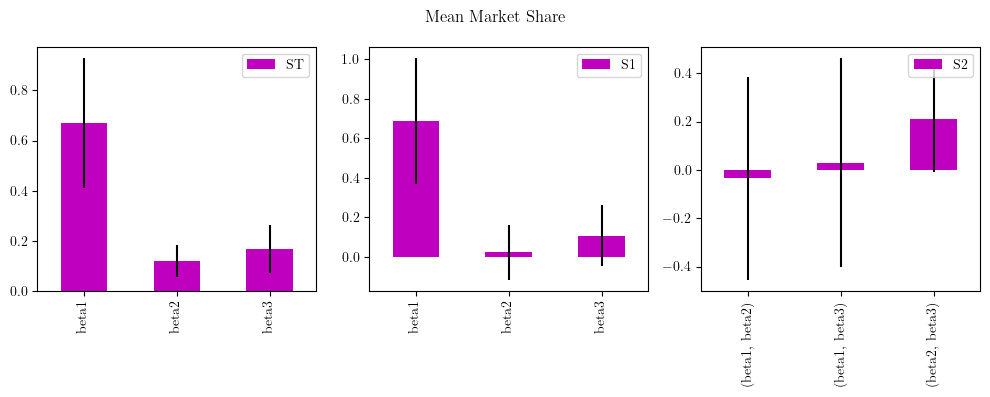

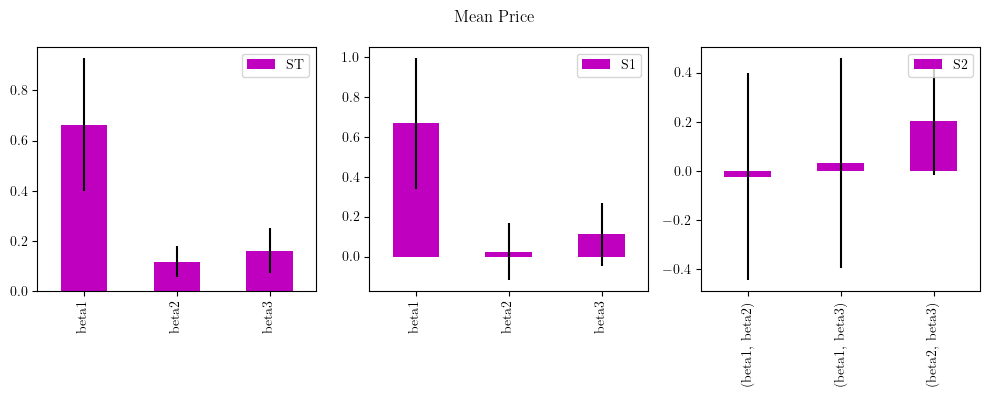

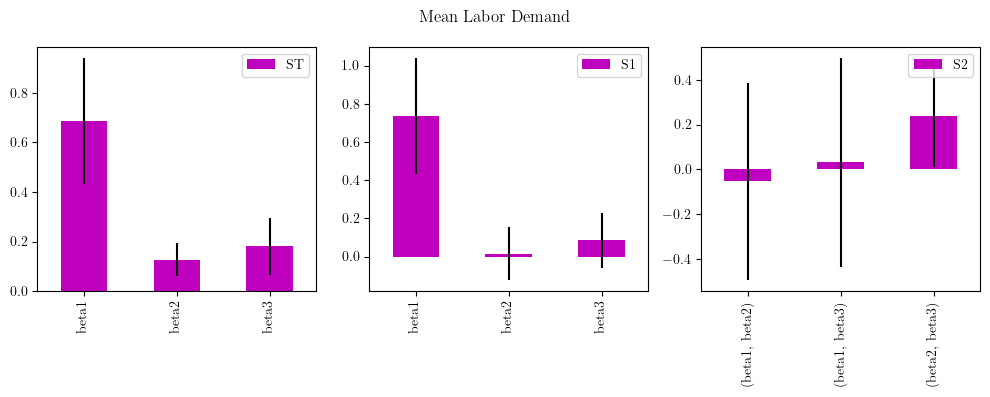

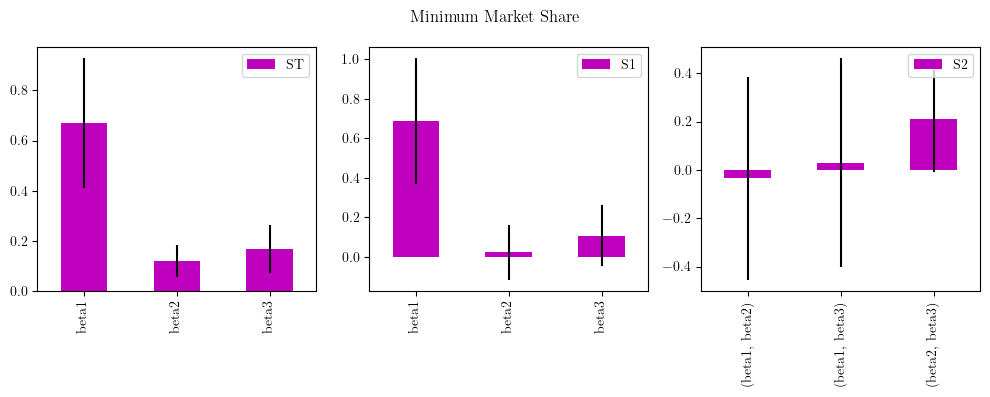

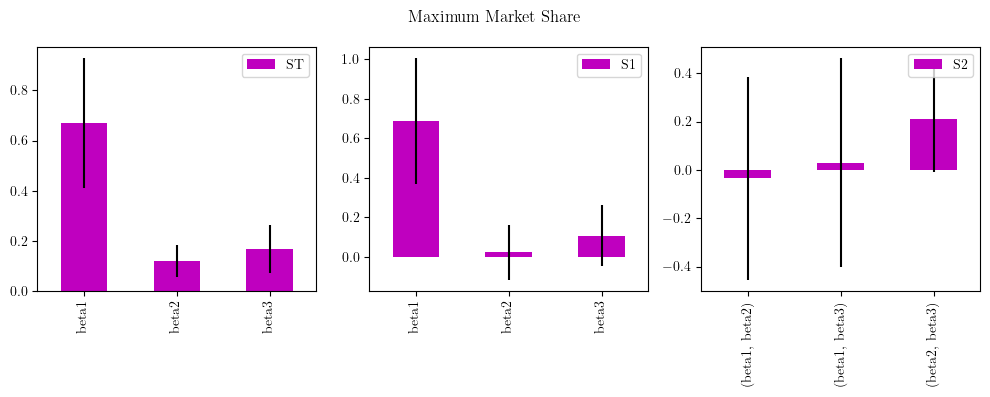

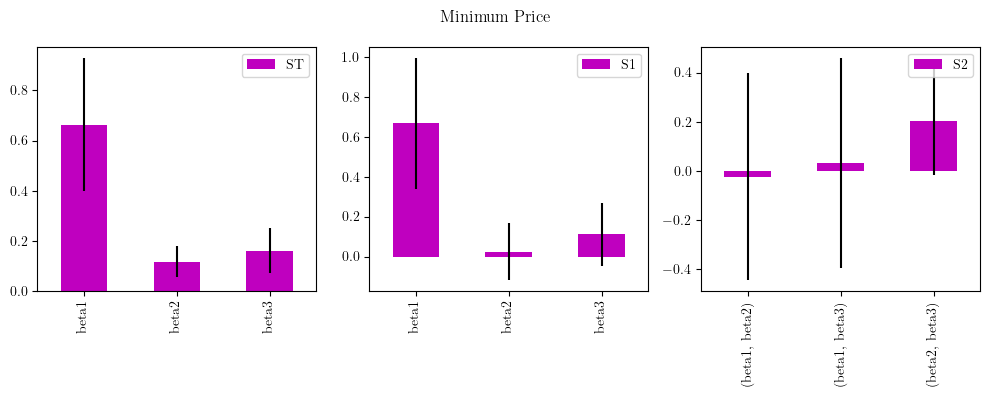

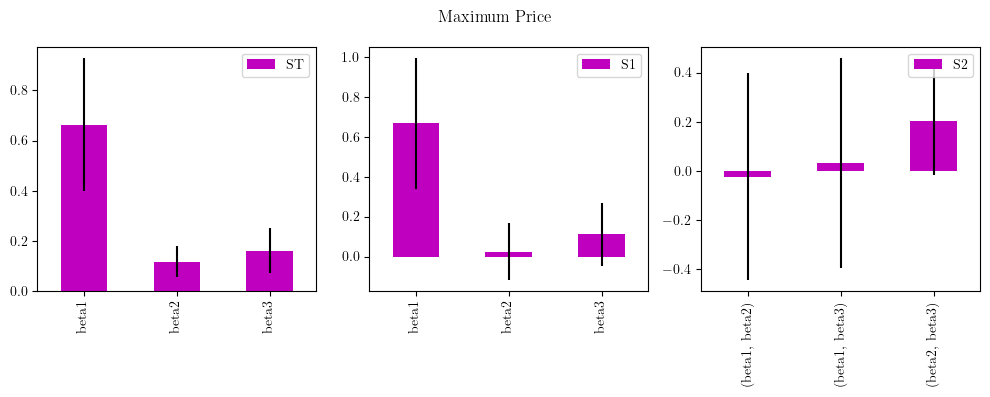

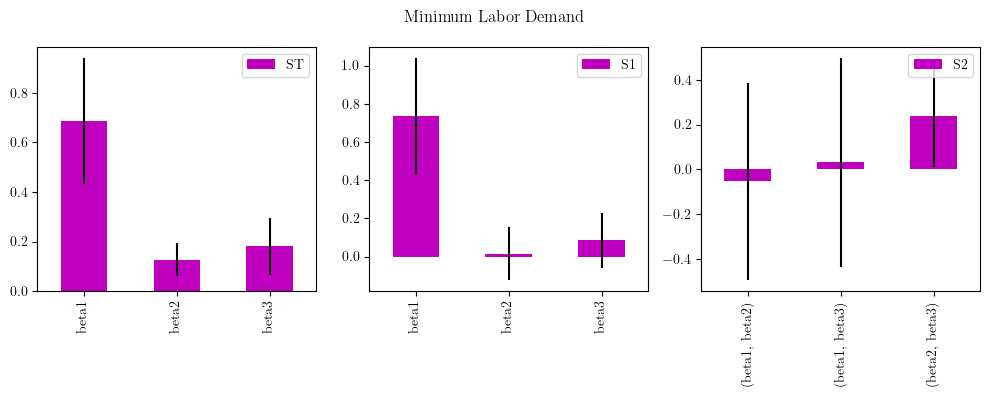

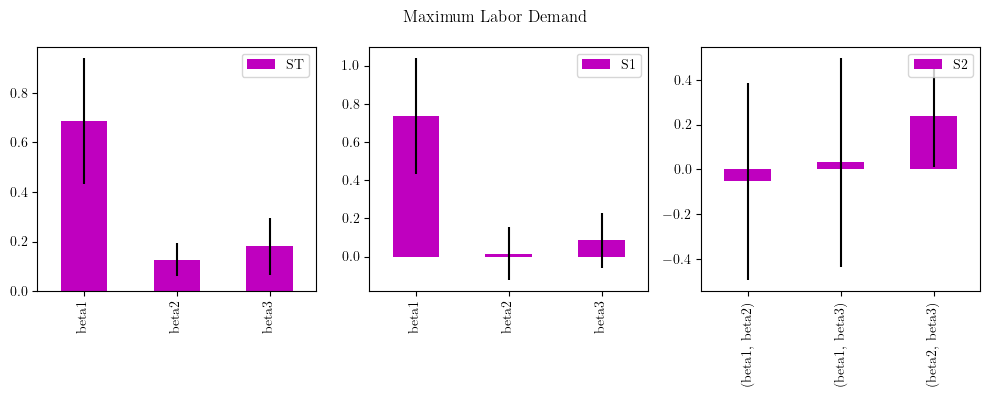

In [16]:
import os

# Specify the directory to save the figures
output_dir = "sensitivity_figures"
os.makedirs(output_dir, exist_ok=True)

# dep_vars = ['min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']
dep_vars = ['mean_mm', 'mean_p', 'mean_l', 'min_mm', 'max_mm', 'min_p', 'max_p', 'min_l', 'max_l']

graph_names = ['Mean Market Share', 'Mean Price', 'Mean Labor Demand', 'Minimum Market Share', 'Maximum Market Share', 'Minimum Price', 'Maximum Price', 'Minimum Labor Demand', 'Maximum Labor Demand']

pink_sunset = "#FFA3B9"


for i, name in enumerate(dep_vars):
    Si_sobol = sobol.analyze(problem, Y[:, i], calc_second_order=True, print_to_console=False, seed=1234)

    axes = Si_sobol.plot()
    fig = plt.gcf()  # get current figure
    fig.set_size_inches(10, 4)
    fig.suptitle(graph_names[i])
    # plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    plt.tight_layout()




    # Save the figure as a PDF
    output_path = os.path.join(output_dir, f'sensitivity_{name.replace(" ", "_")}.pdf')
    plt.savefig(output_path, format='pdf')

    # Display the figure
    plt.show()